# Tópicos
- Gerar análises com a base de dados de janeiro
- Criar uma função para gerar esses gráficos
- Salvar os gráficos como imagens para utilização posterior em powerpoints ou documentos


# Índice

1. [Importando bibliotecas](#import)
2. [Carregando o dataframe SINASC](#read)
2. [Gráficos](#cont_idade_mae)
    2. [Contagem da IDADEMAE x Tempo ](#exemplo_1)
    2. [Quantidade de bebês ao longo do ano](#exemplo_2)
    2. [Quantidade de bebês fem e masc por mês](#exemplo_3)
    2. [Média peso dos bebês fem e masc](#exemplo_4)
    2. [Peso x Escolaridade mãe (ESCMAE)](#exemplo_5)
    2. [Gestacão](#exemplo_6)
2. [Utilizando função](#funcao)
2. [Salvando os gráficos](#salvando)





# 1. Importando bibliotecas <a name="import"></a>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()  


In [6]:
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# 2. Carregando o dataframe SINASC <a name="read"></a>


![Janeiro](imagens/Jan.png)

In [7]:
sinasc = pd.read_csv('SINASC_RO_2019_JAN.csv')
sinasc.head()

,Unnamed: 0,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,72,1,6663834.0,110002,1,29,2.0,12 anos ou mais,999992.0,0.0,...,5,73,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
1,73,1,6663834.0,110002,1,25,2.0,12 anos ou mais,999992.0,0.0,...,5,74,ATIVO,MUNIC,Cujubim,Rondônia,-9.37819,-62.58717,111.0,3863.943
2,74,1,2515601.0,110002,1,35,2.0,8 a 11 anos,999992.0,1.0,...,5,75,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
3,75,1,2515601.0,110002,1,24,2.0,12 anos ou mais,524105.0,0.0,...,4,76,ATIVO,MUNIC,Alto Paraíso,Rondônia,-9.71667,-63.31763,128.0,2651.822
4,76,1,2515601.0,110002,1,26,1.0,12 anos ou mais,999992.0,0.0,...,5,77,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571


# 3. Gráficos

## 3.1 Contagem da IDADEMAE x Tempo  <a name="exemplo_1"></a>


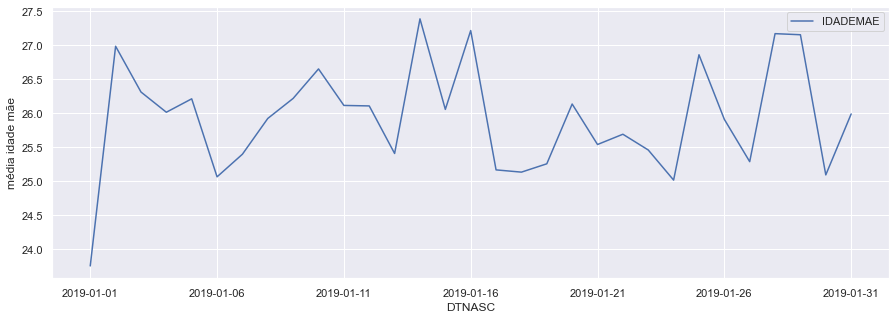

In [25]:
pd.pivot_table(sinasc, values='IDADEMAE', index='DTNASC',
               aggfunc='mean').plot(figsize=[15, 5])
plt.ylabel('média idade mãe');


## 3.2 Quantidade de bebês ao longo do ano <a name="exemplo_2"></a>


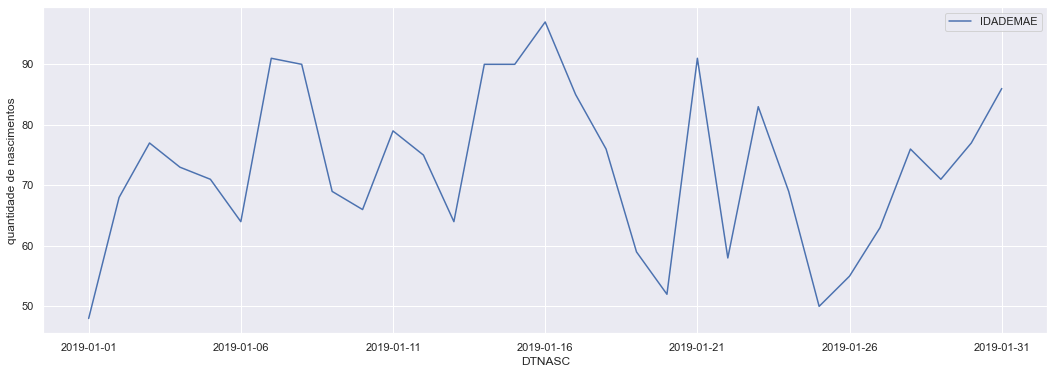

In [26]:
pd.pivot_table(sinasc, values='IDADEMAE', index='DTNASC',
               aggfunc='count').plot(figsize=[18, 6])
plt.ylabel('quantidade de nascimentos');


## 3.3 Quantidade de bebês fem e masc por mês <a name="exemplo_3"></a>

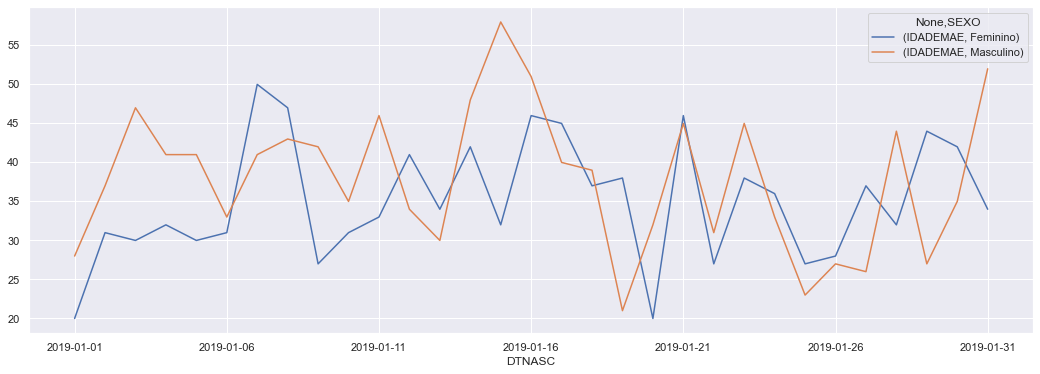

In [27]:
pd.pivot_table(sinasc, values='IDADEMAE', index=['DTNASC', 'SEXO'],
               aggfunc='count').unstack().plot(figsize=[18, 6]);


## 3.4 Média peso dos bebês fem e masc<a name="exemplo_4"></a>

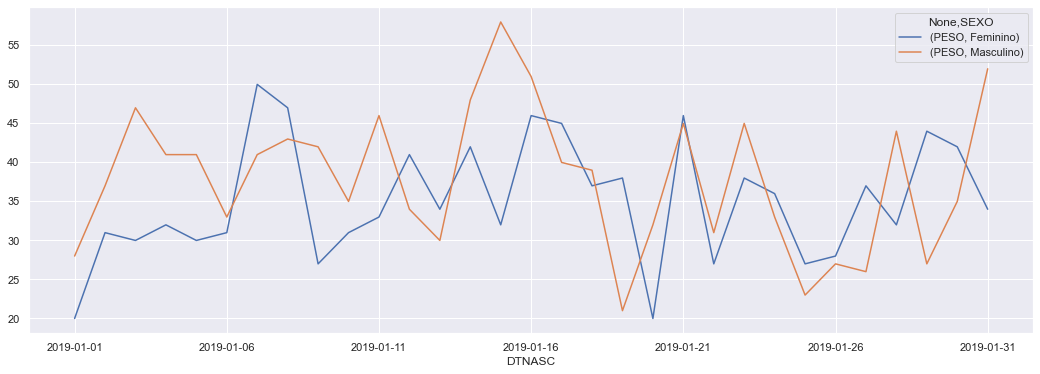

In [28]:

pd.pivot_table(sinasc, values='PESO', index=['DTNASC', 'SEXO'],
               aggfunc='count').unstack().plot(figsize=[18, 6]);

## 3.5 Peso x Escolaridade mãe (ESCMAE) <a name="exemplo_5"></a>


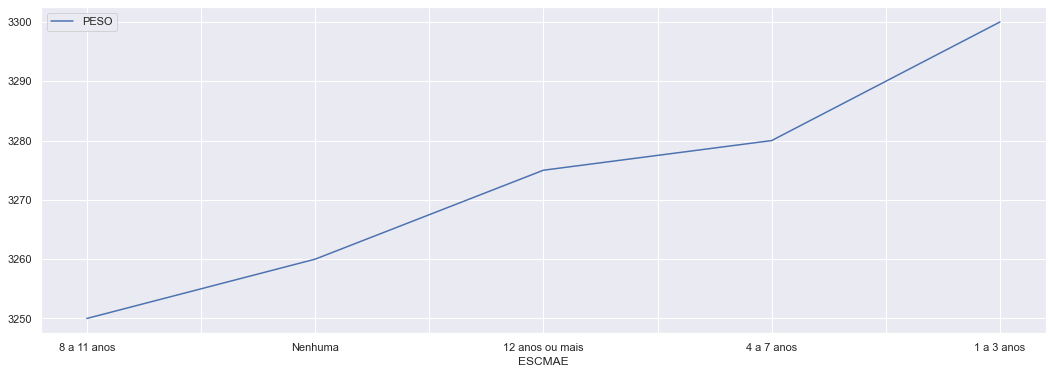

In [29]:
pd.pivot_table(sinasc, values='PESO', index=['ESCMAE'],
               aggfunc='median').sort_values('PESO').plot(figsize=[18, 6]);

## 3.6 Gestacão <a name="exemplo_6"></a>


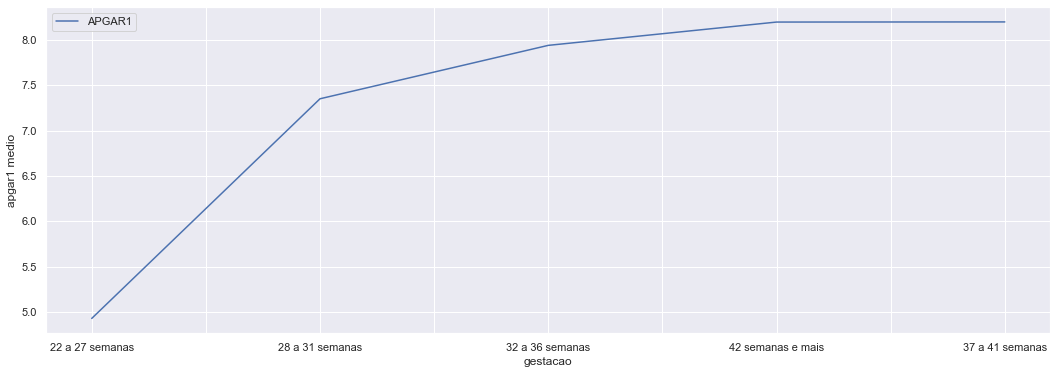

In [30]:
pd.pivot_table(sinasc, values='APGAR1', index=['GESTACAO'],
               aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6])
plt.ylabel('apgar1 medio')
plt.xlabel('gestacao');



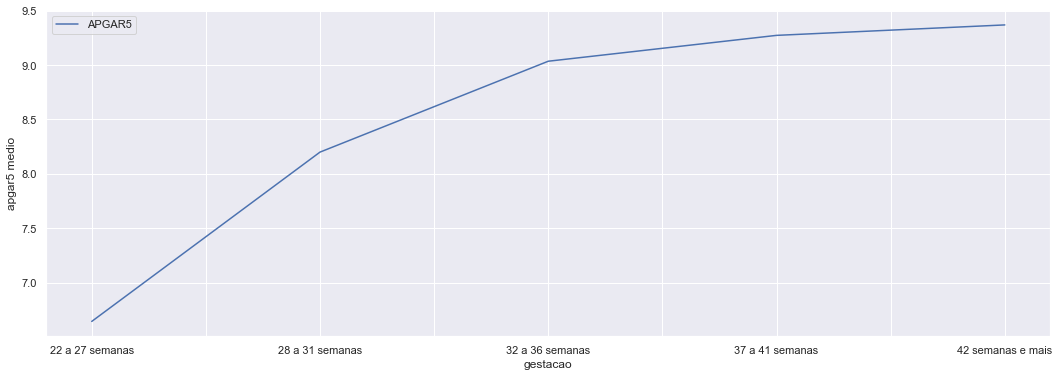

In [31]:
pd.pivot_table(sinasc, values='APGAR5', index=['GESTACAO'],
               aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6])
plt.ylabel('apgar5 medio')
plt.xlabel('gestacao');

# 4. Utilizando função <a name="funcao"></a>

In [32]:
max_data = sinasc.DTNASC.max()[:7]
max_data

'2019-01'

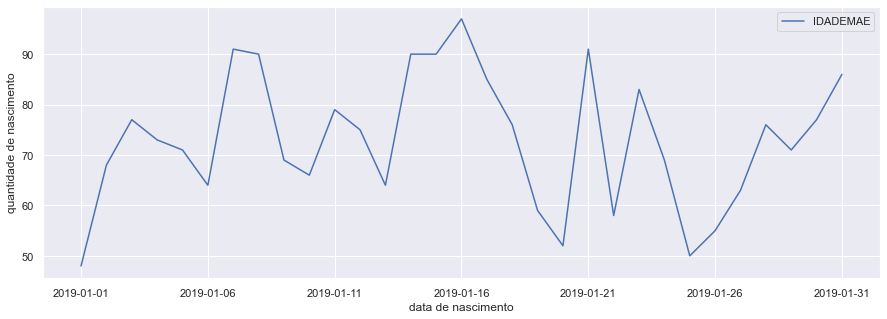

In [34]:
plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')


# 5. Salvando os gráficos <a name="salvando"></a>

In [41]:
import os

In [42]:
pwd

'D:\\lucas_000\\Documents\\EBAC\\modulos\\Módulo 14'

In [43]:
max_data = sinasc.DTNASC.max()[:7]
max_data

'2019-01'

In [46]:
os.makedirs('./output/figs/'+max_data, exist_ok=True)

In [ ]:
plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

In [ ]:
plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

In [ ]:
plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

In [ ]:
plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

In [ ]:
plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')

# Célula única - janeiro

![Janeiro](imagens/Jan.png)

2019-01-01 2019-01-31
2019-01


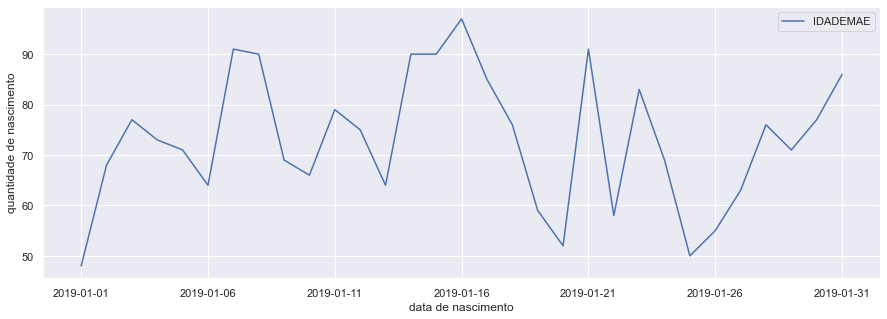

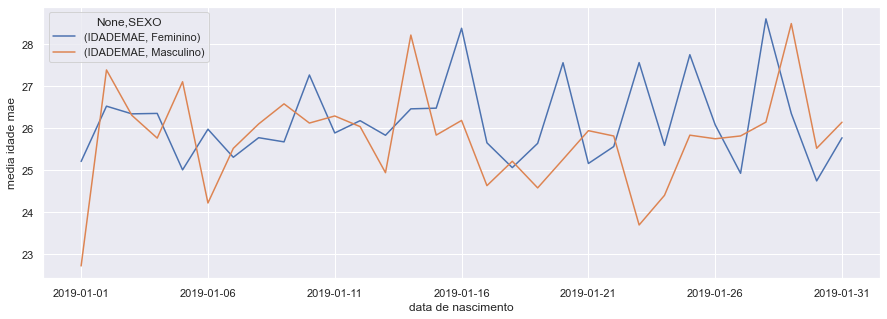

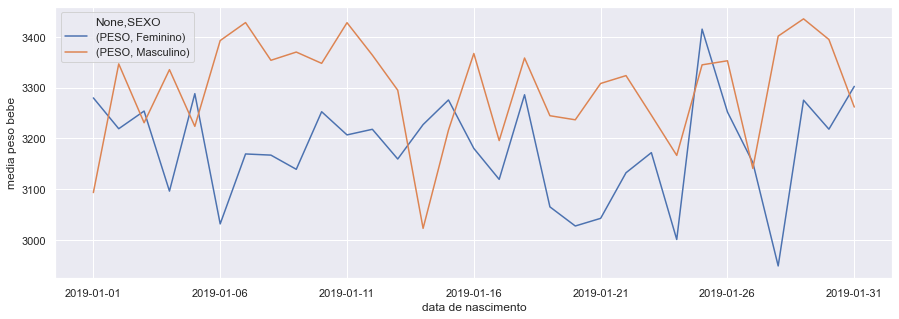

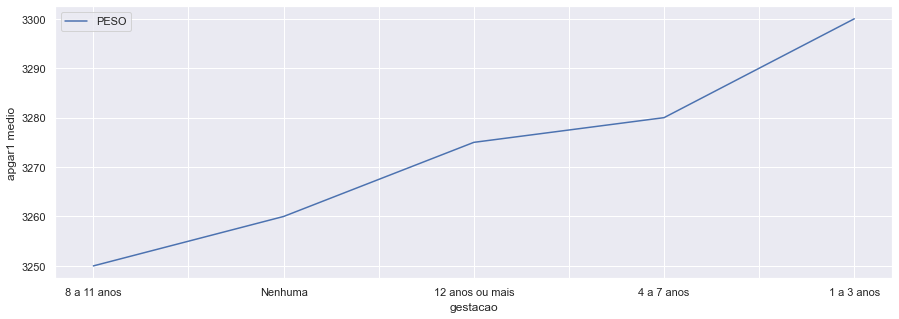

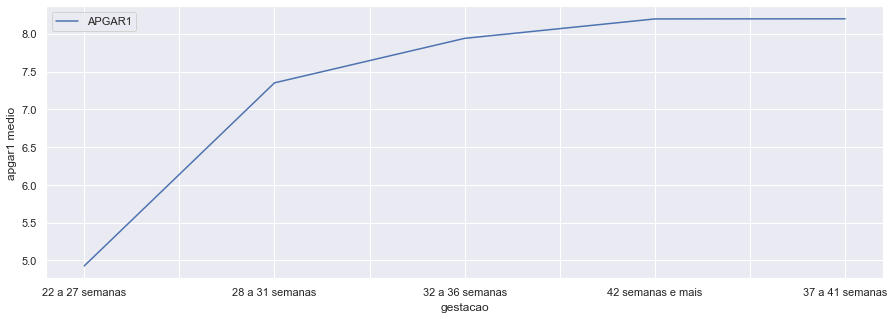

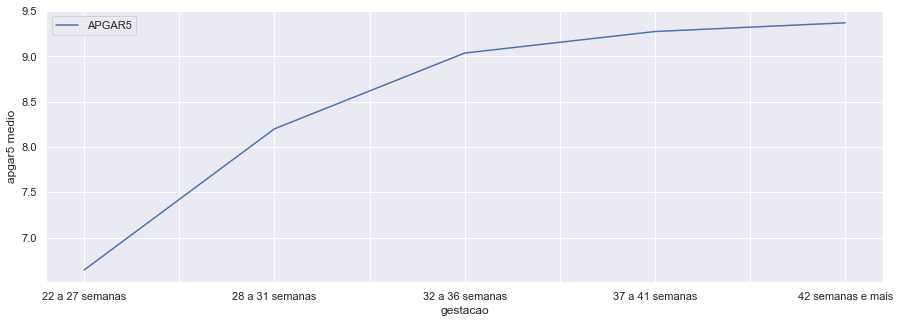

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()  

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

sinasc = pd.read_csv('SINASC_RO_2019_JAN.csv')
print(sinasc.DTNASC.min(), sinasc.DTNASC.max())

max_data = sinasc.DTNASC.max()[:7]
print(max_data)
os.makedirs('./output/figs/'+max_data, exist_ok=True)


plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
plt.savefig('./output/figs/'+max_data+'/quantidade de nascimento.png')

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')


# Célula única - fevereiro

![Fevereiro](imagens/Fev.png)

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()  

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

sinasc = pd.read_csv('SINASC_RO_2019_FEV.csv')
print(sinasc.DTNASC.min(), sinasc.DTNASC.max())

max_data = sinasc.DTNASC.max()[:7]
print(max_data)
os.makedirs('./output/figs/'+max_data, exist_ok=True)


plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
plt.savefig('./output/figs/'+max_data+'/quantidade de nascimento.png')

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')

FileNotFoundError: [Errno 2] No such file or directory: 'SINASC_RO_2019_FEV.csv'